In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphenetools import gt
import re,glob,os
from scipy.signal import argrelextrema
from scipy.optimize import brentq
import multiprocessing 
import sys,importlib
from dgutils import colors as colortools
from collections import defaultdict
import pickle
from matplotlib.ticker import MaxNLocator
# Notebook display options
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
from pimcscripts import pimchelp
from collections import defaultdict
from fractions import Fraction
blue_color = (0, 0, 1)          
black_color = (0, 0, 0)       
orange_color = (1, 0.647, 0)    
red_color = (1, 0, 0)           
green_color = (0, .5, 0)        
dark_orange_color = (0.6, 0.2, 0.8)
darker_blue_color = (0, 0, 0.5)
darker_red_color = (0.6, 0.2, 0.8)
# Manually specify the major tick positions as fractions of 48
def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x == 1:
        return '1'
    else:
        return f"{frac.numerator}/{frac.denominator}"        


In [2]:
directory_paths = {
    r'$N_g = 0$': '../data/NOdata',
    r'$N_g = 1$': '../data/FIRSTdata',
    r'$N_g = 2$': '../data/SECONDdata',
    r'$N_g = 3$':'../data/THIRDdata',
    r'$N_g = \infty$':'../data/FULLdata',
    r'$N_g = MidNo$': '../data/MidNo',
    r'$N_g = HiNo$': '../data/HiNo',
    r'$N_g = T1Hi$': '../data/T1Hi',
    r'$N_g = T1Mid$': '../data/T1Mid'
}
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")


Key: $N_g = 0$, Value: ../data/NOdata
Key: $N_g = 1$, Value: ../data/FIRSTdata
Key: $N_g = 2$, Value: ../data/SECONDdata
Key: $N_g = 3$, Value: ../data/THIRDdata
Key: $N_g = \infty$, Value: ../data/FULLdata
Key: $N_g = MidNo$, Value: ../data/MidNo
Key: $N_g = HiNo$, Value: ../data/HiNo
Key: $N_g = T1Hi$, Value: ../data/T1Hi
Key: $N_g = T1Mid$, Value: ../data/T1Mid


In [3]:

chemical_dict={}
EN_dict={}
ENError_dict={}
N_dict={}
NError_dict={}
E_dict={}
EError_dict={}
Estimator_dict = {}
r={}
rho={}
Super ={}
for key, value in directory_paths.items():
    if key ==r'$N_g = Phase$' or key ==r'$N_g = T1comm$':
        continue
    else:
        EN = []
        ENError =[]
        u = []
        N = []
        NError = []
        E = []
        EError =[]
        r = []
        rho = []
        wd = directory_paths[key]
        Data = np.loadtxt(f"{wd}/estimator-u-reduce.dat")
        for i in range(0,len(Data)):
            EN.append(Data[i][17])
            ENError.append(Data[i][18])
            u.append(Data[i][0])
            E.append(Data[i][9])
            EError.append(Data[i][10])
            N.append(Data[i][19])
            NError.append(Data[i][20])
        chemical_dict[key] = u
        EN_dict[key] = EN
        ENError_dict[key] = ENError
        N_dict[key] = N
        NError_dict[key] = NError
        E_dict[key] = E
        EError_dict[key] = EError
linear_density = {}
for key, value in directory_paths.items():
    linear_density[key] = pimchelp.PIMCResults(f"{value}/lineardensity-u-reduce.dat")
    Estimator_dict[key] = pimchelp.PIMCResults(f"{value}/estimator-u-reduce.dat")
    Super[key] = pimchelp.PIMCResults(f"{value}/super-u-reduce.dat")

In [4]:
# data1 = pd.read_fwf(f"{wd}/lineardensity-u-reduce.dat", skiprows=1)
# #print(data1.head())
# linear_density = {}
# linear_density['first'] = pimchelp.PIMCResults(f"{wd}/lineardensity-u-reduce.dat")
# #print(linear_density)
#print(linear_density['FullShell'].params)
#print(linear_density['FullShell'].headers)
print(Super[r'$N_g = 0$'].params)
print(Super[r'$N_g = 0$'].headers)


[]
('u', 'rho_s/rho', 'Δrho_s/rho', 'W^2(x)', 'ΔW^2(x)', 'W^2(y)', 'ΔW^2(y)', 'W^2(z)', 'ΔW^2(z)', 'P(-10)', 'ΔP(-10)', 'P(-9)', 'ΔP(-9)', 'P(-8)', 'ΔP(-8)', 'P(-7)', 'ΔP(-7)', 'P(-6)', 'ΔP(-6)', 'P(-5)', 'ΔP(-5)', 'P(-4)', 'ΔP(-4)', 'P(-3)', 'ΔP(-3)', 'P(-2)', 'ΔP(-2)', 'P(-1)', 'ΔP(-1)', 'P(+0)', 'ΔP(+0)', 'P(+1)', 'ΔP(+1)', 'P(+2)', 'ΔP(+2)', 'P(+3)', 'ΔP(+3)', 'P(+4)', 'ΔP(+4)', 'P(+5)', 'ΔP(+5)', 'P(+6)', 'ΔP(+6)', 'P(+7)', 'ΔP(+7)', 'P(+8)', 'ΔP(+8)', 'P(+9)', 'ΔP(+9)', 'P(+10)', 'ΔP(+10)', 'Area_rho_s', 'ΔArea_rho_s')


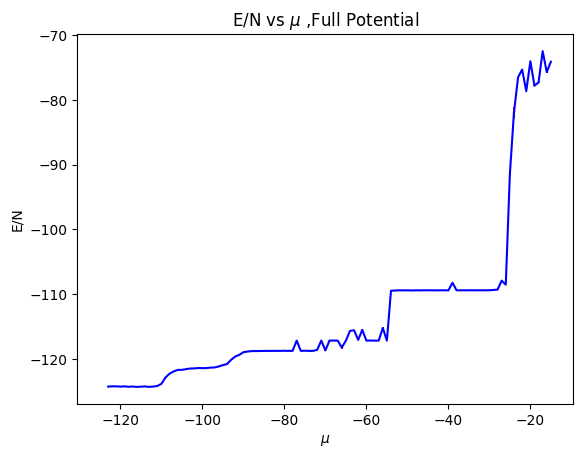

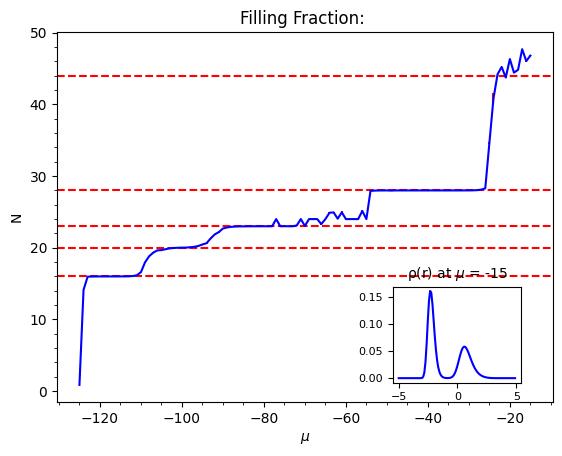

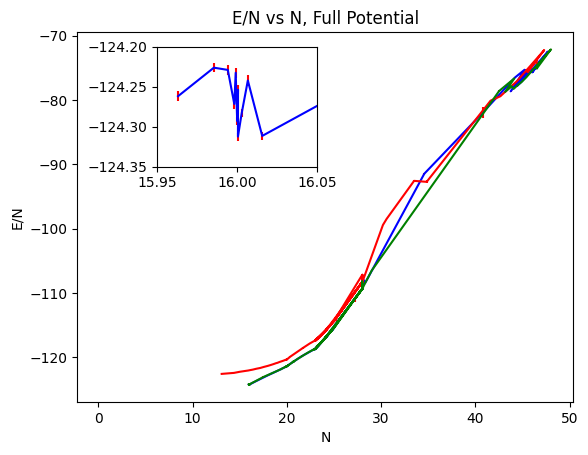

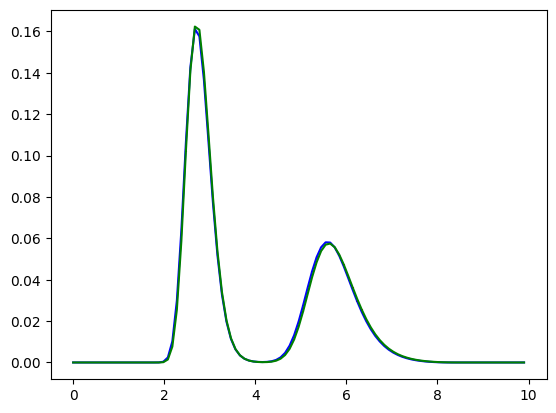

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib.ticker as ticker
plt.errorbar(chemical_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Full Potential')
#plt.xlim(-80,-40)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)
#-----------------------
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],N_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.axhline(y=16, color='red', linestyle='--',label='d')
ax_main.axhline(y=20, color='red', linestyle='--',label='d')
ax_main.axhline(y=23, color='red', linestyle='--',label='d')
ax_main.axhline(y=28, color='red', linestyle='--',label='d')
ax_main.axhline(y=44, color='red', linestyle='--',label='d')

major_tick_spacing_y = 10  # Spacing for major ticks
minor_tick_spacing_y = 2   # Spacing for minor ticks
ax_main.yaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_y))
ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_y))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel('N')
ax_main.set_title(r'Filling Fraction: ')


# Create the zoomed-in subplot
zoom_left = 0.65  # Specify the left position of the zoomed-in subplot
zoom_bottom = 0.15  # Specify the bottom position of the zoomed-in subplot, adjust this value as needed
zoom_width = 0.2  # Specify the width of the zoomed-in subplot
zoom_height = 0.2  # Specify the height of the zoomed-in subplot
ax_zoom2 = fig.add_axes([zoom_left, zoom_bottom, zoom_width, zoom_height])
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]'], linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -15", fontsize=10)  # Adjust the font size
ax_zoom2.tick_params(axis='both', which='both', labelsize=8) 
plt.show()
#---------------------
'''
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict['FullShell'],[x/48 for x in N_dict['FullShell']], yerr=[x/48 for x in ENError_dict['FullShell']],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density['FullShell'].data['u = -23.00 -- r [Å]'],linear_density['FullShell'].data['u = -23.00 -- ρ(r)'],yerr=linear_density['FullShell'].data['u = -23.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -24 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
'''
#-----------------------

fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_main.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='red',ecolor='red')
ax_main.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='green',ecolor='red')

ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Full Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.95,16.05)
ax_inner.set_ylim(-124.35,-124.2)
plt.rcParams['text.usetex'] = True
plt.show()

plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
plt.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color='green', ecolor='red')
plt.show()

#plt.rcParams.update(plt.rcParamsDefault)
#plt.errorbar(Super['FullShell'].data['u'], Super['FullShell'].data['rho_s/rho'], yerr=Super['FullShell'].data['Δrho_s/rho'], color='blue', ecolor='red')
#plt.errorbar(Super['ThirdShell'].data['u'], Super['ThirdShell'].data['rho_s/rho'], yerr=Super['ThirdShell'].data['Δrho_s/rho'], color='green', ecolor='red')
#plt.show()

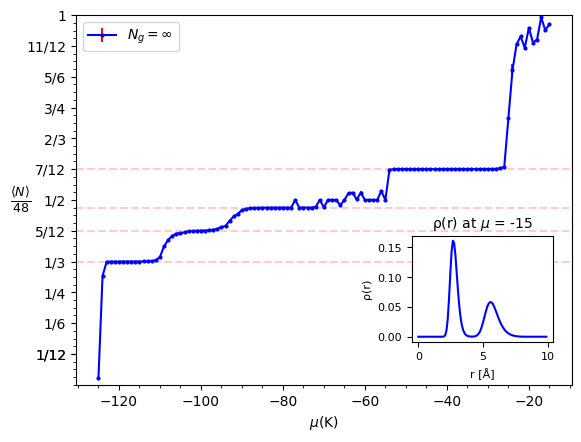

In [6]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax_main = plt.subplots()
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,
                 yerr=err,color='blue',ecolor='red',marker='o',
                 markersize=2, linestyle='-', label =r'$N_g = \infty$' )
ax_main.set_xlabel(r'$\mu$(K)',fontsize=10)
ax_main.set_ylim(0, 1)
ax_main.axhline(y=16/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='red',alpha=.2, linestyle='--')
#ax_main.axhline(y=44, color='red', linestyle='--',label='d')
# Manually specify the major tick positions as fractions of 48
def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x ==1:
        return 1
    else:
        return f"{frac.numerator}/{frac.denominator}"

# Set the y-axis limits to match the range [0, 1]
#ax_main.set_ylim(0, 1)

# Manually specify the major tick positions as fractions of 48
major_tick_positions = [1/12,4/48,8/48,12/48,1/3,20/48,24/48,28/48,32/48,36/48,40/48,44/48, 1]
ax_main.set_yticks(major_tick_positions)

# Apply the custom formatter to the y-axis
ax_main.yaxis.set_major_formatter(ticker.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=1/48))
# Set the y-axis minor locator to add more minor ticks
#ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=1/48))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'$\frac{\langle N \rangle}{48}$',fontsize=13)
ax_main.yaxis.get_label().set_rotation(0)
ax_main.yaxis.get_label().set_verticalalignment('center') 
#ax_main.set_title(r'Filling Fraction: ')

#ax_main.grid(which='both', axis='y', linestyle='--')

# Create the zoomed-in subplot
zoom_left = 0.65  # Specify the left position of the zoomed-in subplot
zoom_bottom = 0.2  # Specify the bottom position of the zoomed-in subplot, adjust this value as needed
zoom_width = 0.22  # Specify the width of the zoomed-in subplot
zoom_height = 0.22 # Specify the height of the zoomed-in subplot
ax_zoom2 = fig.add_axes([zoom_left, zoom_bottom, zoom_width, zoom_height])
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -15", fontsize=10)  # Adjust the font size
ax_zoom2.tick_params(axis='both', which='both', labelsize=8) 
ax_zoom2.set_ylabel(r'ρ(r)',fontsize=8)
ax_zoom2.set_xlabel(r'r [Å]',fontsize=8)
ax_main.legend()
plt.show()

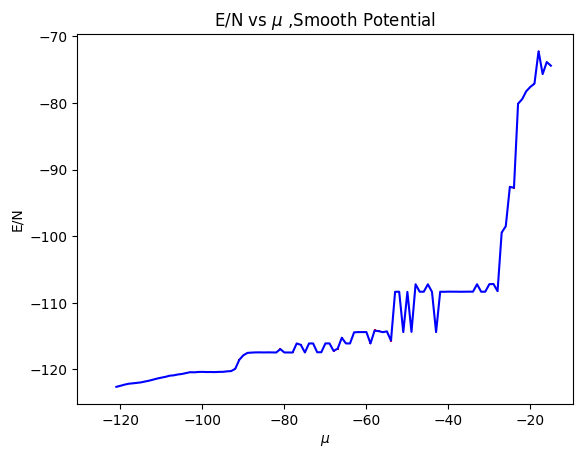

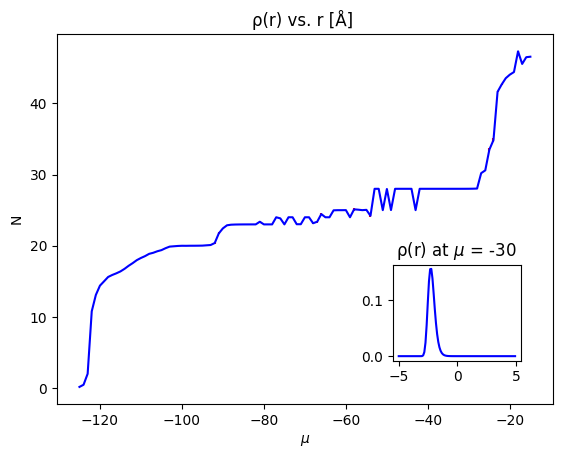

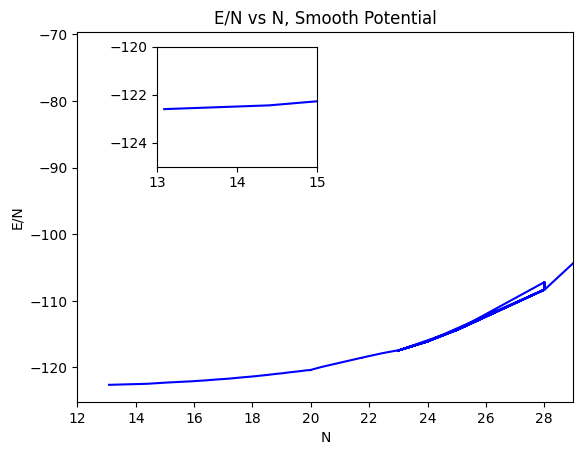

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
#print(u)
#print(EN)
plt.errorbar(chemical_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Smooth Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],N_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density[r'$N_g = 0$'].data['u = -30.00 -- r [Å]'],linear_density[r'$N_g = 0$'].data['u = -30.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 0$'].data['u = -30.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -30 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Smooth Potential')
ax_main.set_xlim(12,29)


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_inner.set_xlim(13,15)
ax_inner.set_ylim(-125,-120)
plt.show()

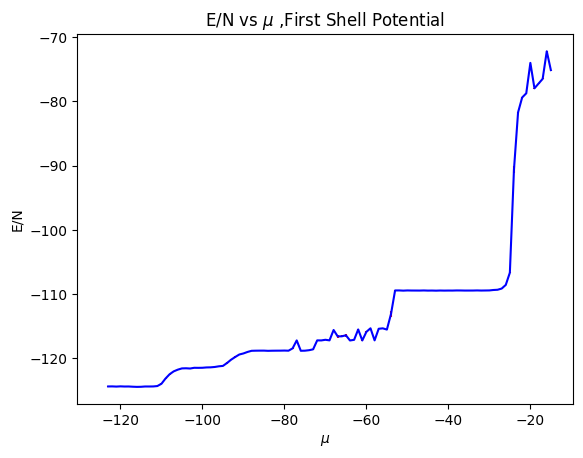

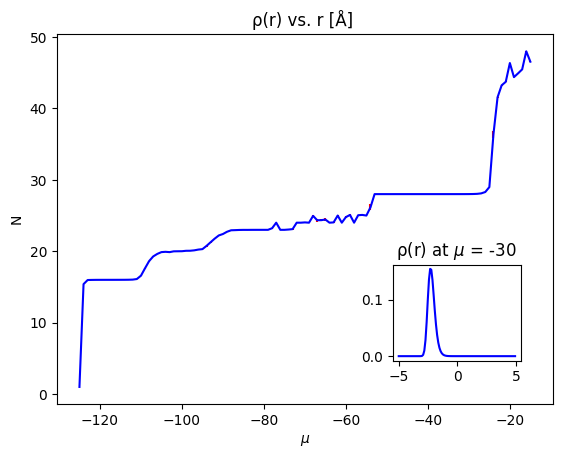

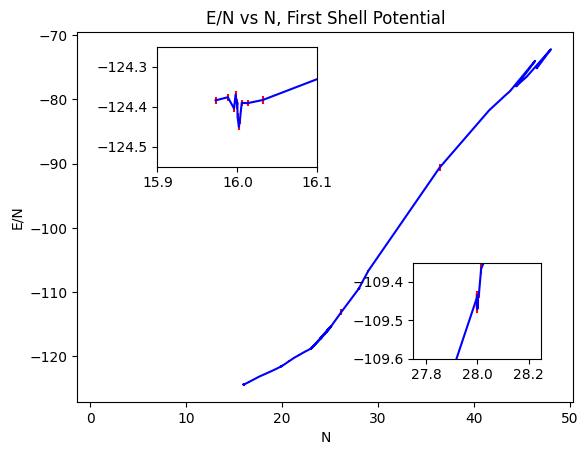

In [8]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,First Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = 1$'],N_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density[r'$N_g = 1$'].data['u = -30.00 -- r [Å]'],linear_density[r'$N_g = 1$'].data['u = -30.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 1$'].data['u = -30.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -30 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, First Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.55,-124.25)
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_zoom2.set_xlim(27.75,28.25)
ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()

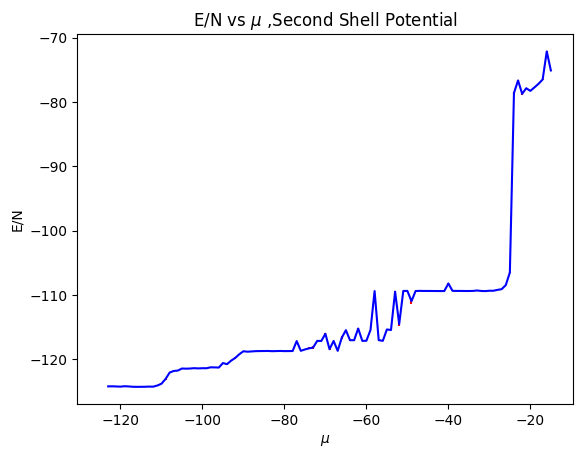

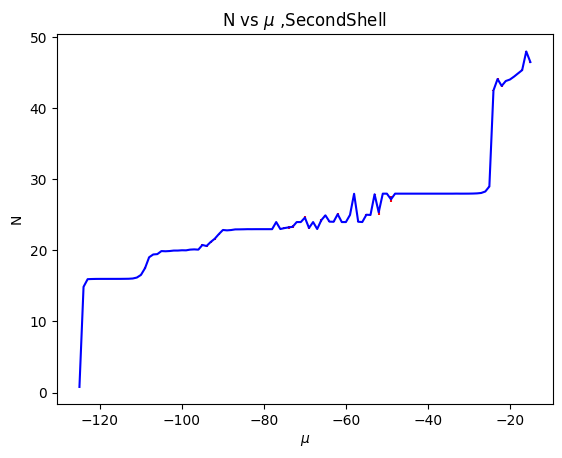

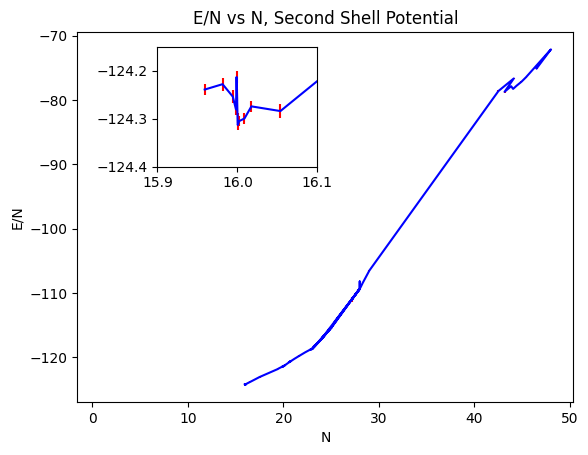

In [9]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Second Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
plt.errorbar(chemical_dict[r'$N_g = 2$'],N_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('N')
plt.title(r'N vs $\mu$ ,SecondShell')
#plt.xlim(-80,-40)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Second Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.4,-124.15)
plt.show()

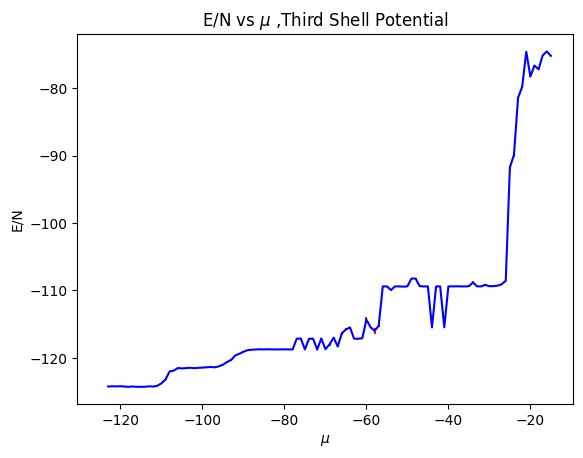

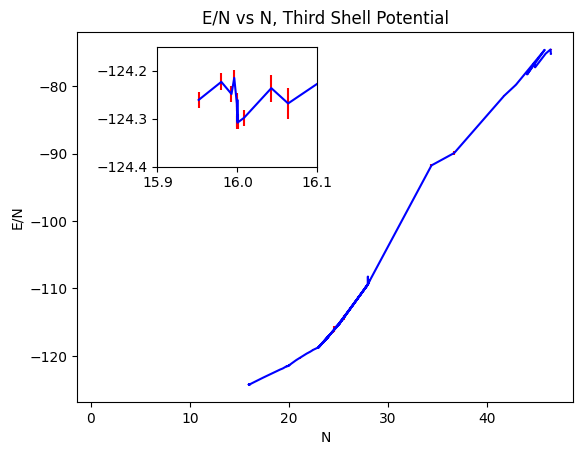

In [10]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Third Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Third Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.4,-124.15)
plt.show()

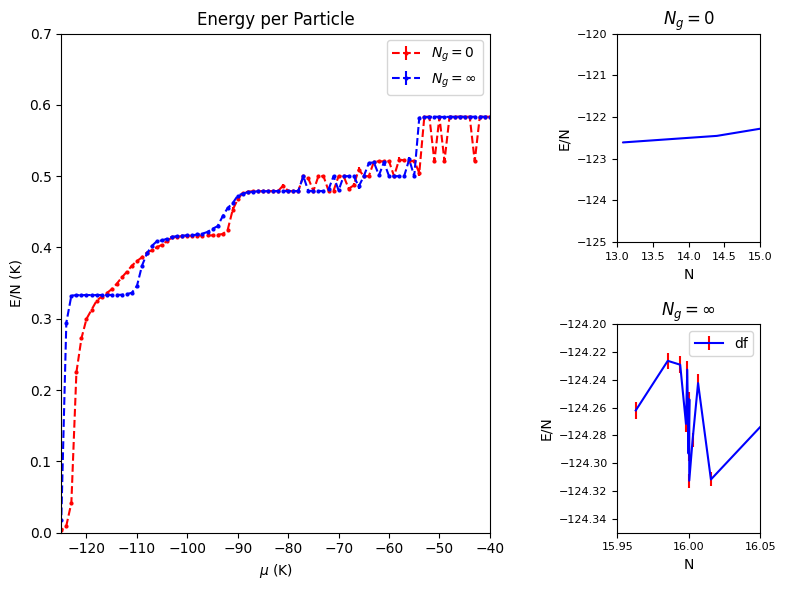

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure and gridspec
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1])  # Updated width_ratios

# Generate the main plot data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create the main plot
ax_main = plt.subplot(gs[:, 0])  # Change the column index to 0
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)

ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,
                 yerr=err,color='red',marker='o', markersize=2, linestyle='--',label=r'$N_g = 0$')
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,
                 yerr=err,color='blue',marker='o', markersize=2, 
                 linestyle='--',label=r'$N_g = \infty$')
ax_main.set_xlabel(r'$\mu$ (K)',fontsize=10)
ax_main.set_ylabel('E/N (K)',fontsize=10)
ax_main.set_title('Energy per Particle')
ax_main.set_xlim(-125,-40)
ax_main.set_ylim(0,.7)
ax_main.legend()
# Create the plot in the top right corner
ax_corner = plt.subplot(gs[0, 1])  # Change the column index to 1
ax_corner.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_corner.set_xlabel('N')
ax_corner.set_ylabel('E/N')
ax_corner.set_title(r'$N_g = 0$')
ax_corner.set_xlim(13,15)
ax_corner.set_ylim(-125,-120)
# Create the zoomed-in plot
ax_zoom = plt.subplot(gs[1, 1])  # Change the column index to 1 and the row index to 1
ax_zoom.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red',label='df')
ax_zoom.set_xlim(15.95,16.05)  # Set the x-axis limits for zooming
ax_zoom.set_ylim(-124.35,-124.2)  # Set the y-axis limits for zooming
ax_zoom.set_xlabel('N')
ax_zoom.set_ylabel('E/N')
ax_zoom.set_title(r'$N_g = \infty$')
ax_zoom.legend()
# Adjust the spacing between the subplots
plt.tight_layout()
ax_corner.tick_params(axis='both', which='both', labelsize=8)
ax_zoom.tick_params(axis='both', which='both', labelsize=8)
# Display the figure
plt.show()

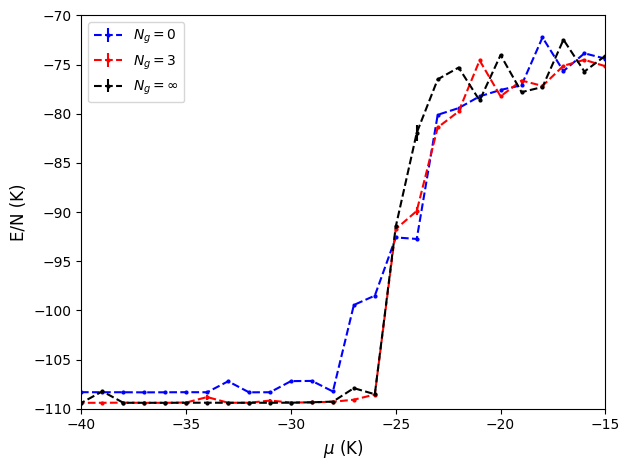

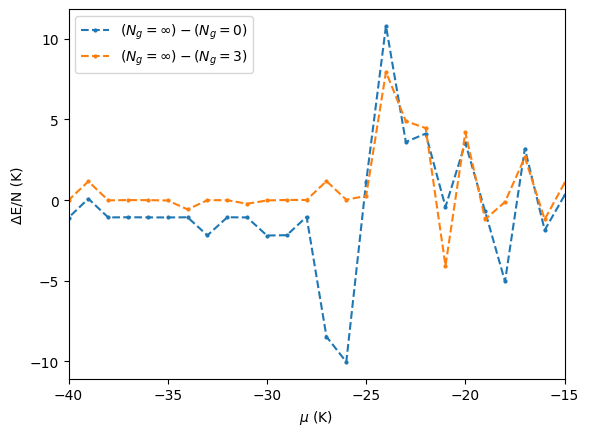

In [12]:
colors_dict = {r'$N_g = 0$':'blue',r'$N_g = 1$':'orange',r'$N_g = 2$':'green',r'$N_g = 3$':'red',r'$N_g = \infty$':'black'}
for key, value in directory_paths.items():
    #print(u)
    #print(EN)
    if key ==r'$N_g = 1$' or key ==r'$N_g = 2$' or key ==r'$N_g = MidNo$' or key ==r'$N_g = HiNo$' or key ==r'$N_g = T1comm$' or key ==r'$N_g = T1Hi$' or key ==r'$N_g = T1Mid$':
        pass
    else:
        plt.rcParams.update(plt.rcParamsDefault)
        plt.errorbar(chemical_dict[key],EN_dict[key],yerr=ENError_dict[key],label=key,marker='o',linestyle='--', markersize=2,color=colors_dict[key])
        #plt.axhline(y=-75, color='red',alpha=.2, linestyle='--')
        plt.xlabel(r'$\mu$ (K)',fontsize=12)
        plt.ylabel('E/N (K)',fontsize=12)
        #plt.ylabel.set_rotation(0)
        #plt.title(r'E/N vs $\mu$ ,All Potential')
    plt.xlim(-40,-15)
    plt.ylim(-110,-70)
plt.legend()
plt.tight_layout()
#plt.savefig('Images/AllButNo_EN_1.pdf', format='pdf')
plt.show()
#----------------------
#----------------------
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(np.array(chemical_dict[r'$N_g = \infty$'])[:111],np.array(EN_dict[r'$N_g = \infty$'])[:111]-np.array(EN_dict[r'$N_g = 0$']),label=r'$(N_g = \infty) - (N_g = 0)$',marker='o',linestyle='--', markersize=2)
plt.errorbar(np.array(chemical_dict[r'$N_g = \infty$'])[:111],np.array(EN_dict[r'$N_g = \infty$'])[:111]-np.array(EN_dict[r'$N_g = 3$']),label=r'$(N_g = \infty) - (N_g = 3)$',marker='o',linestyle='--', markersize=2)
plt.xlabel(r'$\mu$ (K)',fontsize=10)
plt.ylabel('ΔE/N (K)',fontsize=10)
plt.xlim(-40,-15)
#plt.xlim(-40,-15)
#plt.ylim(-110,-70)
    #print(u)
    #print(EN)
plt.legend()
plt.show()



C:\Users\evilb\AppData\Local\Temp\ipykernel_47480\1920340986.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


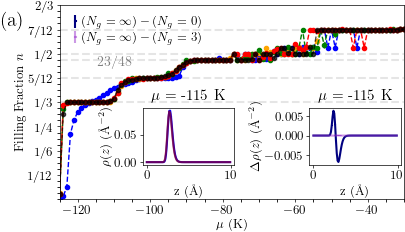

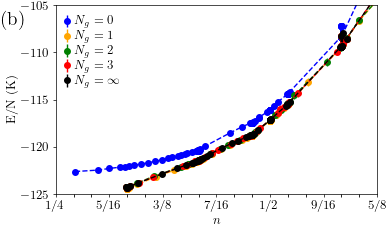

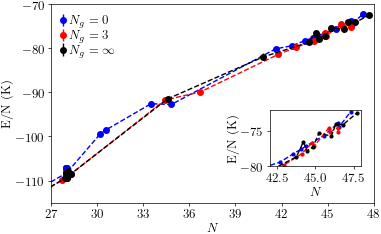

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from fractions import Fraction
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

fig, ax_main = plt.subplots(figsize=((8.5*.49, 5.253*.49)))

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,yerr=err,
                 color=blue_color,marker='o', linewidth=1, markersize=3, linestyle='--',label=r'$N_g = 0$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 1$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 1$'],np.array(N_dict[r'$N_g = 1$'])/48,yerr=err,
                 color=orange_color,marker='o', linewidth=1, markersize=3, linestyle='--',label=r'$N_g = 1$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 2$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 2$'],np.array(N_dict[r'$N_g = 2$'])/48,yerr=err,
                 color=green_color,marker='o', linewidth=1, markersize=3, linestyle='--',label=r'$N_g = 2$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 3$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 3$'],np.array(N_dict[r'$N_g = 3$'])/48,yerr=err,
                 color=red_color,marker='o', linewidth=1, markersize=3, linestyle='--',label=r'$N_g = 3$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,yerr=err,
                 color=black_color,marker='o', linewidth=1, markersize=3, linestyle='--',label=r'$N_g = \infty$',alpha = .7)

ax_main.set_xlabel(r'$\mu$ (K)')
ax_main.set_xlim(-125, -30)
ax_main.set_ylim(0,2/3)
ax_main.axhline(y=24/48, color='grey',alpha=.2, linestyle='--')
ax_main.text(-110, 22/48, '23/48', color='grey', fontsize=10, ha='center')
ax_main.axhline(y=16/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='grey',alpha=.2, linestyle='--')


major_tick_positions = [1/12,1/6,1/4,1/3,5/12,24/48, 28/48, 32/48]
ax_main.set_yticks(major_tick_positions)
ax_main.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'Filling Fraction $n$')

ax_zoom2 = fig.add_axes([0.74, 0.31, 0.22, 0.22])
ax_zoom2.errorbar(linear_density[r'$N_g = 0$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 0$'].data['u = -115.00 -- Δρ(r)'],color=darker_blue_color,label =r'$(N_g = \infty) - (N_g = 0)$')
ax_zoom2.errorbar(linear_density[r'$N_g = 3$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 3$'].data['u = -115.00 -- Δρ(r)'],color=darker_red_color,alpha=.5,label =r'$(N_g = \infty) - (N_g = 3)$')
ax_zoom2.set_title(r"$\mu$ = -115 K ")
ax_zoom2.set_xlabel(r'z $(\textrm{\AA})$')  # Add x label
ax_zoom2.set_ylabel(r'$\Delta \rho(z)$ $(\textrm{\AA}{}^{-2}$)')


ax_zoom1 = fig.add_axes([0.34, 0.31, 0.22, 0.22])
ax_zoom1.errorbar(linear_density[r'$N_g = 0$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 0$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 0$'].data['u = -115.00 -- Δρ(r)'],color=blue_color)
ax_zoom1.errorbar(linear_density[r'$N_g = 3$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 3$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 3$'].data['u = -115.00 -- Δρ(r)'],color=red_color,alpha=.5)
ax_zoom1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -80.00 -- Δρ(r)']+linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)'],color=black_color,alpha=.2)

ax_zoom1.set_title(r"$\mu$ = -115 K ")
ax_zoom1.set_xlabel(r'z $(\textrm{\AA})$')  # Add x label
ax_zoom1.set_ylabel(r'$\rho(z)$ $(\textrm{\AA}{}^{-2}$)')
ax_main.legend().set_visible(False)

legend_inset = ax_main.legend(*ax_zoom2.get_legend_handles_labels(), loc='upper right', bbox_to_anchor=(.45, 1))
plt.tight_layout()
ax_main.text(-0.17, .97, "(a)", transform=ax_main.transAxes, fontsize=14, va='top', ha='left')
plt.savefig('../figures/Fig3a.pdf', format='pdf')
plt.savefig('../figures/Fig3a.svg', format='svg')
plt.show()
#-------------------------------------------------------------------

sorted_indices = {}
sorted_N = {}
sorted_EN = {}
sorted_ENError={}
for key, label in directory_paths.items():
    sorted_indices[key] = np.argsort(N_dict[key])
    sorted_N[key] = [N_dict[key][i] for i in sorted_indices[key]]
    sorted_EN[key] = [EN_dict[key][i] for i in sorted_indices[key]]
    sorted_ENError[key] = [ENError_dict[key][i] for i in sorted_indices[key]]
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

fig, ax_main = plt.subplots(figsize=(8.5*.48, 5.253*.48))
ax_main.errorbar(np.array(sorted_N[r'$N_g = 0$'])/48,sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 0$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 1$'])/48,sorted_EN[r'$N_g = 1$'],yerr=sorted_ENError[r'$N_g = 1$'],color=orange_color,ecolor=orange_color,marker='o',linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 1$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 2$'])/48,sorted_EN[r'$N_g = 2$'],yerr=sorted_ENError[r'$N_g = 2$'],color=green_color,ecolor=green_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 2$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 3$'])/48,sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 3$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = \infty$'])/48,sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = \infty$')
major_tick_positions2 = [1/4,5/16,3/8,7/16,1/2, 9/16, 5/8]
ax_main.set_xticks(major_tick_positions2)
ax_main.xaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
ax_main.set_xlim(12/48,5/8)
ax_main.set_ylim(-125,-105)
ax_main.set_xlabel(r'$n$')
ax_main.set_ylabel(r'E/N (K)')
plt.tight_layout()
ax_main.text(-.17, .97, "(b)", transform=ax_main.transAxes,
         fontsize=14, va='top', ha='left')
ax_main.legend()

plt.savefig('../figures/Fig3b.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../figures/Fig3b.svg', format='svg', bbox_inches='tight')

plt.show()

#--------------------------------------------------------------------
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])

fig, ax_main = plt.subplots(figsize=(8.5*.49, 5.253*.49))
ax_main.errorbar(sorted_N[r'$N_g = 0$'],sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 0$')
ax_main.errorbar(sorted_N[r'$N_g = 3$'],sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 3$')
ax_main.errorbar(sorted_N[r'$N_g = \infty$'],sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = \infty$')
ax_main.xaxis.set_major_locator(MaxNLocator(integer=True))
ax_main.set_xlim(27,48)
ax_main.set_ylim(-115,-70)
ax_main.set_xlabel(r'$N$')
ax_main.set_ylabel(r'E/N (K)')

ax_zoom2 = fig.add_axes([0.65, 0.25, 0.22, 0.22])
ax_zoom2.errorbar(sorted_N[r'$N_g = 0$'],sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_g = 0$')
ax_zoom2.errorbar(sorted_N[r'$N_g = 3$'],sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_g = 3$')
ax_zoom2.errorbar(sorted_N[r'$N_g = \infty$'],sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o',linewidth=1, markersize=2, linestyle='--',label=r'$N_g = \infty$')


ax_zoom2.set_xlabel(r'$N$')  # Add x label
ax_zoom2.set_ylabel(r'E/N (K)')
ax_zoom2.set_xlim(42,48)
ax_zoom2.set_ylim(-80,-72)
ax_main.legend(loc='upper left')
plt.savefig('../figures/Fig6.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../figures/Fig6.svg', format='svg', bbox_inches='tight')

plt.show()

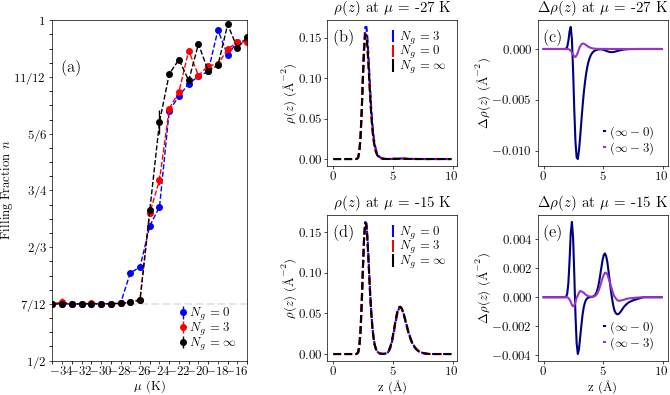

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from fractions import Fraction
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
aps = plt.rcParams
#fig = plt.figure(figsize=(12, 6))
#gs = gridspec.GridSpec(2, 3, width_ratios=[3, 2, 2], height_ratios=[1, 1])
fig = plt.figure(figsize=(8.5*.8, 5.253*.8))
gs = gridspec.GridSpec(2, 3, width_ratios=[3, 2,2], height_ratios=[1, 1])

ax_main = plt.subplot(gs[:, 0])
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,
                 yerr=err,color=blue_color,marker='o',linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 0$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 3$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 3$'],np.array(N_dict[r'$N_g = 3$'])/48,yerr=err,
                 color=red_color,marker='o', linewidth=1, markersize=4, linestyle='--',label=r'$N_g = 3$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,yerr=err,
                 color=black_color,marker='o',linewidth=1, markersize=4, linestyle='--',label=r'$N_g = \infty$')
ax_main.set_xlabel(r'$\mu$ (K)')
ax_main.set_xlim(-35, -15)
ax_main.set_ylim(1/2,1)
ax_main.axhline(y=16/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='grey',alpha=.2, linestyle='--')

major_tick_positions = [24/48, 28/48, 32/48, 36/48, 40/48, 44/48, 1]
ax_main.set_yticks(major_tick_positions)
ax_main.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 2  # Spacing for major ticks
minor_tick_spacing_x = 1   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'Filling Fraction $n$')

ax_corner1 = plt.subplot(gs[1, 1]) 
ax_corner1.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color=blue_color,linestyle='--',alpha=1,label=r'$N_g = 0$')
ax_corner1.errorbar(linear_density[r'$N_g = 3$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -15.00 -- Δρ(r)'], color=red_color,linestyle='--',alpha=1,label=r'$N_g = 3$')
ax_corner1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'],linestyle='--', color=black_color,label=r'$N_g = \infty$')
ax_corner1.tick_params(axis='both', which='both')
ax_corner1.set_ylabel(r'$\rho (z)$ $(\textrm{\AA} ^{-2})$')
ax_corner1.set_xlabel(r'z $(\textrm{\AA})$')
ax_corner1.set_title(r" $\rho (z)$ at $\mu$ = -15 K")

# Create the second subplot on the middle right
ax_zoom1 = plt.subplot(gs[0, 1])  # Change the column index to 1 and the row index to 1
ax_zoom1.errorbar(linear_density[r'$N_g = 0$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -27.00 -- Δρ(r)'], color=blue_color,linestyle='--',alpha=1,label=r'$N_g = 3$')
ax_zoom1.errorbar(linear_density[r'$N_g = 3$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -27.00 -- Δρ(r)'], color=red_color,linestyle='--',alpha=1,label=r'$N_g = 0$')
ax_zoom1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -27.00 -- Δρ(r)'],linestyle='--', color=black_color,label=r'$N_g = \infty$')
ax_zoom1.tick_params(axis='both', which='both')
ax_zoom1.set_ylabel(r'$\rho (z)$ $(\textrm{\AA} ^{-2})$')
ax_zoom1.set_title(r" $\rho (z)$ at $\mu$ = -27 K")
# Create the third subplot on the bottom right
ax_corner2 = plt.subplot(gs[1, 2])  # Change the column index to 1
ax_corner2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'],linestyle='-', color=darker_blue_color,label =r'$(\infty - 0)$')
ax_corner2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'],linestyle='-', color=dark_orange_color,label =r'$(\infty - 3)$')
ax_corner2.tick_params(axis='both', which='both')
ax_corner2.set_xlabel(r'z $(\textrm{\AA})$')
ax_corner2.set_ylabel(r'$\Delta \rho(z)$ $(\textrm{\AA} ^{-2})$')
ax_corner2.set_title(r"$\Delta \rho(z)$ at $\mu$ = -15 K")

# Create the fourth subplot on the bottom right
ax_zoom2 = plt.subplot(gs[0, 2])  # Change the column index to 1 and the row index to 1
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -27.00 -- ρ(r)'], color=darker_blue_color,label =r'$(\infty - 0)$')
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -27.00 -- ρ(r)'], color=dark_orange_color,label =r'$(\infty - 3)$')
ax_zoom2.tick_params(axis='both', which='both')
#ax_zoom2.set_xlabel(r'z $(\textrm{\AA})$')
ax_zoom2.set_ylabel(r'$\Delta \rho(z)$ $(\textrm{\AA} ^{-2})$')
ax_zoom2.set_title(r"$\Delta \rho(z)$ at $\mu$ = -27 K")

#create a legend
ax_main.legend(loc='lower right')
ax_corner1.legend(loc='upper right')
ax_corner2.legend(loc='lower right')
ax_zoom1.legend(loc='upper right')
ax_zoom2.legend(loc='lower right')
panel_labels = ['(a)', '(d)', '(b)', '(e)', '(c)']
i=0
for ax in [ax_main,ax_corner1,ax_zoom1,ax_corner2, ax_zoom2]:  # Iterate over the GridSpec object gs
    ax.text(0.05, 0.85, panel_labels[i], transform=ax.transAxes, fontsize=12)
    i+=1

plt.tight_layout()
plt.subplots_adjust(right=1)
plt.savefig('../figures/Fig5.pdf', format='pdf')
plt.savefig('../figures/Fig5.svg', format='svg')
plt.show()

[   0.83724002 -124.4884629 ]
[  -0.84729048 -121.69198182]
[-124.308387, -124.354029, -124.283309]
[-121.76814, -121.883726, -121.941119]
Error $N_g = \infty$: $\Delta$ a=0.191, $\Delta$ b=0.040
Error $N_g = 0$: $\Delta$ a=1.932, $\Delta$ b=0.399
y-intercept $N_g = \infty$: b=-124.488
y-intercept $N_g = 0$: b=-121.692


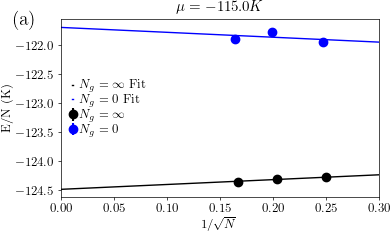

In [15]:
from scipy.optimize import curve_fit
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
plt.figure(figsize=(8.5*.49, 5.253*.49))
def func(x,a,b):
    return a*x+b
u_value = -115
Finite_Size_EN = [Estimator_dict[r'$N_g = T1Mid$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['E/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta = [Estimator_dict[r'$N_g = T1Mid$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_N = [1/Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN = [1/np.sqrt(Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]

Finite_Size_EN_No = [Estimator_dict[r'$N_g = MidNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['E/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta_No = [Estimator_dict[r'$N_g = MidNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_N_No = [1/Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN_No = [1/np.sqrt(Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
plt.errorbar(Finite_Size_SqrtN,Finite_Size_EN,yerr=Finite_Size_ENDelta,fmt='o',color=black_color,label=r'$N_g = \infty$')
plt.errorbar(Finite_Size_SqrtN_No,Finite_Size_EN_No,yerr=Finite_Size_ENDelta_No,fmt='o',color=blue_color,label=r'$N_g = 0$')
popt, pcov = curve_fit(func, Finite_Size_SqrtN, Finite_Size_EN)
popt1, pcov1 = curve_fit(func, Finite_Size_SqrtN_No, Finite_Size_EN_No)
perr = np.sqrt(np.diag(pcov))
perr1 = np.sqrt(np.diag(pcov1))
print(popt)
print(popt1)
print(Finite_Size_EN)
print(Finite_Size_EN_No)
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt), '-',label=r'$N_g = \infty$ Fit',linewidth=1, markersize=2,color=black_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt+perr),func(np.linspace(0, 0.25, 100), *popt-perr),alpha=0.3, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr))
print(r'Error $N_g = \infty$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr))
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt1), '-',label=r'$N_g = 0$ Fit',linewidth=1, markersize=2,color = blue_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt1+perr1),func(np.linspace(0, 0.25, 100), *popt1-perr1),alpha=0.1, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr1))
print(r'Error $N_g = 0$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr1))
print(r'y-intercept $N_g = \infty$: b=%5.3f' % func(0, *popt))
print(r'y-intercept $N_g = 0$: b=%5.3f' % func(0, *popt1))
plt.xlim(0,.30)
#plt.ylim(-125,-110)
plt.xlabel(r"1/$\sqrt{N}$")
plt.ylabel("E/N (K)")
plt.title(r"$\mu = %5.1f K$" % u_value)
plt.legend(loc='center left')

plt.text(-0.15, 1.05, "(a)", transform=plt.gca().transAxes, fontsize=14, va='top', ha='left')
plt.tight_layout()
plt.savefig('../figures/Fig7.pdf', format='pdf')
plt.savefig('../figures/Fig7.svg', format='svg')
plt.show()

[  23.11773861 -123.79365533]
[  21.23305208 -122.08765391]
[-120.166221, -120.282393, -118.780465]
[-118.848299, -118.822273, -117.440206]
Error $N_g = \infty$: $\Delta$ a=10.437, $\Delta$ b=1.850
Error $N_g = 0$: $\Delta$ a=11.979, $\Delta$ b=2.122
y-intercept $N_g = \infty$: b=-123.794
y-intercept $N_g = 0$: b=-122.088


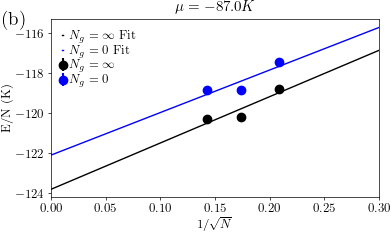

In [16]:
from scipy.optimize import curve_fit
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
plt.figure(figsize=(8.5*.49, 5.253*.49))
def func(x,a,b):
    return a*x+b
u_value = -87
Finite_Size_EN = [Estimator_dict[r'$N_g = T1Mid$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['E/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta = [Estimator_dict[r'$N_g = T1Mid$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_N = [1/Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN = [1/np.sqrt(Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]

Finite_Size_EN_No = [Estimator_dict[r'$N_g = MidNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['E/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta_No = [Estimator_dict[r'$N_g = MidNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_N_No = [1/Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN_No = [1/np.sqrt(Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
plt.errorbar(Finite_Size_SqrtN,Finite_Size_EN,yerr=Finite_Size_ENDelta,fmt='o',color=black_color,label=r'$N_g = \infty$')
plt.errorbar(Finite_Size_SqrtN_No,Finite_Size_EN_No,yerr=Finite_Size_ENDelta_No,fmt='o',color=blue_color,label=r'$N_g = 0$')
popt, pcov = curve_fit(func, Finite_Size_SqrtN, Finite_Size_EN)
popt1, pcov1 = curve_fit(func, Finite_Size_SqrtN_No, Finite_Size_EN_No)
perr = np.sqrt(np.diag(pcov))
perr1 = np.sqrt(np.diag(pcov1))
print(popt)
print(popt1)
print(Finite_Size_EN)
print(Finite_Size_EN_No)
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt), '-',label=r'$N_g = \infty$ Fit',linewidth=1, markersize=2,color=black_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt+perr),func(np.linspace(0, 0.25, 100), *popt-perr),alpha=0.3, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr))
print(r'Error $N_g = \infty$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr))
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt1), '-',label=r'$N_g = 0$ Fit',linewidth=1, markersize=2,color = blue_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt1+perr1),func(np.linspace(0, 0.25, 100), *popt1-perr1),alpha=0.1, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr1))
print(r'Error $N_g = 0$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr1))
print(r'y-intercept $N_g = \infty$: b=%5.3f' % func(0, *popt))
print(r'y-intercept $N_g = 0$: b=%5.3f' % func(0, *popt1))
plt.xlim(0,.30)
#plt.ylim(-125,-110)
plt.xlabel(r"1/$\sqrt{N}$")
plt.ylabel("E/N (K)")
plt.title(r"$\mu = %5.1f K$" % u_value)
plt.legend(loc='upper left')
plt.text(-0.15, 1.05, "(b)", transform=plt.gca().transAxes, fontsize=14, va='top', ha='left')
plt.tight_layout()
plt.savefig('../figures/Fig9.pdf', format='pdf')
plt.savefig('../figures/Fig9.svg', format='svg')
plt.show()

[  67.40771353 -122.63963873]
[  92.33249986 -125.78878411]
[-112.835648, -113.378095, -109.396694]
[-111.193496, -113.559686, -108.340112]
Error $N_g = \infty$: $\Delta$ a=29.162, $\Delta$ b=4.711
Error $N_g = 0$: $\Delta$ a=0.036, $\Delta$ b=0.006
y-intercept $N_g = \infty$: b=-122.640
y-intercept $N_g = 0$: b=-125.789


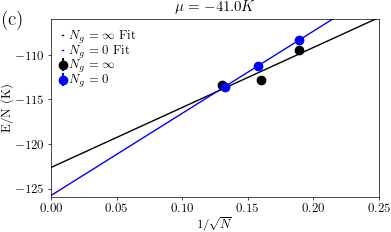

In [17]:
from scipy.optimize import curve_fit
plot_style = {'aps':'aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
plt.figure(figsize=(8.5*.49, 5.253*.49))
def func(x,a,b):
    return a*x+b
u_value = -41
Finite_Size_EN = [Estimator_dict[r'$N_g = T1Mid$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['E/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['E/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta = [Estimator_dict[r'$N_g = T1Mid$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = T1Hi$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = \infty$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0]]
Finite_Size_N = [1/Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN = [1/np.sqrt(Estimator_dict[r'$N_g = T1Mid$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Mid$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = T1Hi$'].data['N'][np.where(Estimator_dict[r'$N_g = T1Hi$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = \infty$'].data['N'][np.where(Estimator_dict[r'$N_g = \infty$'].data['u'] == u_value)][0])]

Finite_Size_EN_No = [Estimator_dict[r'$N_g = MidNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['E/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['E/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_ENDelta_No = [Estimator_dict[r'$N_g = MidNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = HiNo$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0],Estimator_dict[r'$N_g = 0$'].data['ΔE/N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0]]
Finite_Size_N_No = [1/Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0],1/(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
Finite_Size_SqrtN_No = [1/np.sqrt(Estimator_dict[r'$N_g = MidNo$'].data['N'][np.where(Estimator_dict[r'$N_g = MidNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = HiNo$'].data['N'][np.where(Estimator_dict[r'$N_g = HiNo$'].data['u'] == u_value)][0]),1/np.sqrt(Estimator_dict[r'$N_g = 0$'].data['N'][np.where(Estimator_dict[r'$N_g = 0$'].data['u'] == u_value)][0])]
plt.errorbar(Finite_Size_SqrtN,Finite_Size_EN,yerr=Finite_Size_ENDelta,fmt='o',color=black_color,label=r'$N_g = \infty$')
plt.errorbar(Finite_Size_SqrtN_No,Finite_Size_EN_No,yerr=Finite_Size_ENDelta_No,fmt='o',color=blue_color,label=r'$N_g = 0$')
popt, pcov = curve_fit(func, Finite_Size_SqrtN, Finite_Size_EN)
popt1, pcov1 = curve_fit(func, Finite_Size_SqrtN_No, Finite_Size_EN_No)
perr = np.sqrt(np.diag(pcov))
perr1 = np.sqrt(np.diag(pcov1))
print(popt)
print(popt1)
print(Finite_Size_EN)
print(Finite_Size_EN_No)
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt), '-',label=r'$N_g = \infty$ Fit',linewidth=1, markersize=2,color=black_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt+perr),func(np.linspace(0, 0.25, 100), *popt-perr),alpha=0.3, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr))
print(r'Error $N_g = \infty$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr))
plt.plot(np.linspace(0, 0.30, 100), func(np.linspace(0, 0.30, 100), *popt1), '-',label=r'$N_g = 0$ Fit',linewidth=1, markersize=2,color = blue_color)
#plt.fill_between(np.linspace(0, 0.25, 100),func(np.linspace(0, 0.25, 100), *popt1+perr1),func(np.linspace(0, 0.25, 100), *popt1-perr1),alpha=0.1, label = r'Error: $\Delta$a=%5.3f, $\Delta$b=%5.3f' % tuple(perr1))
print(r'Error $N_g = 0$: $\Delta$ a=%5.3f, $\Delta$ b=%5.3f' % tuple(perr1))
print(r'y-intercept $N_g = \infty$: b=%5.3f' % func(0, *popt))
print(r'y-intercept $N_g = 0$: b=%5.3f' % func(0, *popt1))
plt.xlim(0,.25)
plt.ylim(-126,-106)
plt.xlabel(r"1/$\sqrt{N}$")
plt.ylabel("E/N (K)")
plt.title(r"$\mu = %5.1f K$" % u_value)
plt.legend(loc='upper left')

plt.text(-0.15, 1.05, "(c)", transform=plt.gca().transAxes, fontsize=14, va='top', ha='left')
plt.tight_layout()
plt.savefig('../figures/Fig10.pdf', format='pdf')
plt.savefig('../figures/Fig10.svg', format='svg')
plt.show()

In [18]:
sorted_indices = {}
sorted_N = {}
sorted_EN = {}
sorted_ENError={}
num = {
    r'$N_g = 0$': 48,
    r'$N_g = 1$': 48,
    r'$N_g = 2$': 48,
    r'$N_g = 3$': 48,
    r'$N_g = \infty$': 48,
    r'$N_g = MidNo$': 72,
    r'$N_g = HiNo$': 108,
    r'$N_g = T1Hi$': 108,
    r'$N_g = T1Mid$': 72
}
for key, label in directory_paths.items():
    if key =='$N_g = T1comm$':
        continue
    sorted_indices[key] = np.argsort(np.array(Estimator_dict[key].data['N']))
    sorted_N[key] = [Estimator_dict[key].data['N'][i]/num[key] for i in sorted_indices[key]]
    sorted_EN[key] = [Estimator_dict[key].data['E/N'][i] for i in sorted_indices[key]]
    sorted_ENError[key] = [Estimator_dict[key].data['ΔE/N'][i] for i in sorted_indices[key]]


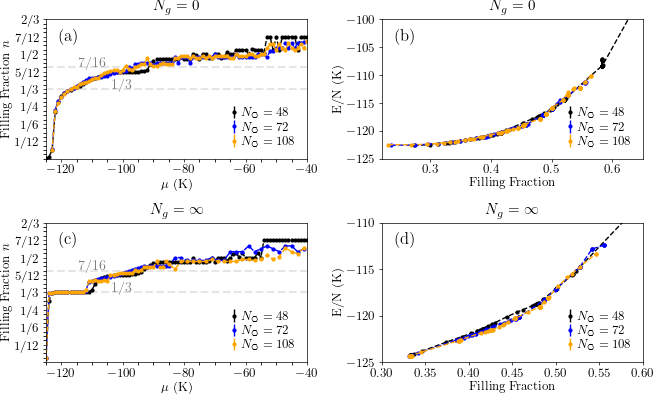

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from fractions import Fraction
#fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(8.5*.8, 5.253*.8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{SVRsymbols}
"""

# Create the main plot
ax_main = plt.subplot(gs[1, 0])
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,yerr=np.array(ENError_dict[r'$N_g = \infty$'])/48,color=black_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 48$')
ax_main.errorbar(chemical_dict[r'$N_g = T1Mid$'],np.array(N_dict[r'$N_g = T1Mid$'])/72,yerr=np.array(ENError_dict[r'$N_g = T1Mid$'])/72,color=blue_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 72$')
ax_main.errorbar(chemical_dict[r'$N_g = T1Hi$'],np.array(N_dict[r'$N_g = T1Hi$'])/108,yerr=np.array(ENError_dict[r'$N_g = T1Hi$'])/108,color=orange_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 108$')

ax_main.set_xlabel(r'$\mu$ (K)')
ax_main.set_xlim(-125, -30)
ax_main.set_ylim(0,2/3)
ax_main.axhline(y=7/16, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=1/3, color='grey',alpha=.2, linestyle='--')
ax_main.text(-110, 7/16, '7/16', color='grey', fontsize=10, ha='center')
ax_main.text(-100, 1/3, '1/3', color='grey', fontsize=10, ha='center')

def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x == 1:
        return '1'
    else:
        return f"{frac.numerator}/{frac.denominator}"
    
major_tick_positions = [1/12,1/6,1/4,1/3,5/12,24/48, 28/48, 32/48]
ax_main.set_yticks(major_tick_positions)
ax_main.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 20 
minor_tick_spacing_x = 5
ax_main.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'Filling Fraction $n$')
ax_main.set_xlim(-125, -40)
ax_main.set_title(r"$N_g = \infty$")

# Create the first subplot on the top right
ax_corner1 = plt.subplot(gs[0, 0])  # Change the column index to 1
ax_corner1.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,yerr=np.array(ENError_dict[r'$N_g = 0$'])/48,color=black_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 48$')
ax_corner1.errorbar(chemical_dict[r'$N_g = MidNo$'],np.array(N_dict[r'$N_g = MidNo$'])/72,yerr=np.array(ENError_dict[r'$N_g = MidNo$'])/72,color=blue_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 72$')
ax_corner1.errorbar(chemical_dict[r'$N_g = HiNo$'],np.array(N_dict[r'$N_g = HiNo$'])/108,yerr=np.array(ENError_dict[r'$N_g = HiNo$'])/108,color=orange_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 108$')
ax_corner1.set_xlabel(r'$\mu$ (K)')
ax_corner1.set_xlim(-125, -40)
ax_corner1.set_ylim(0,2/3)
ax_corner1.axhline(y=7/16, color='grey',alpha=.2, linestyle='--')
ax_corner1.axhline(y=1/3, color='grey',alpha=.2, linestyle='--')
ax_corner1.text(-110, 7/16, '7/16', color='grey', fontsize=10, ha='center')
ax_corner1.text(-100, 1/3, '1/3', color='grey', fontsize=10, ha='center')
major_tick_positions = [1/12,1/6,1/4,1/3,5/12,24/48, 28/48, 32/48]
ax_corner1.set_yticks(major_tick_positions)
ax_corner1.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_corner1.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_corner1.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_corner1.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_corner1.set_ylabel(r'Filling Fraction $n$')
ax_corner1.set_title(r"$N_g = 0$")


# Create the second subplot on the middle right
ax_zoom1 = plt.subplot(gs[1, 1])  # Change the column index to 1 and the row index to 1
ax_zoom1.errorbar(sorted_N[r'$N_g = \infty$'],sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 48$')
ax_zoom1.errorbar(sorted_N[r'$N_g = T1Mid$'],sorted_EN[r'$N_g = T1Mid$'],yerr=sorted_ENError[r'$N_g = T1Mid$'],color=blue_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 72$')
ax_zoom1.errorbar(sorted_N[r'$N_g = T1Hi$'],sorted_EN[r'$N_g = T1Hi$'],yerr=sorted_ENError[r'$N_g = T1Hi$'],color=orange_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 108$')
ax_zoom1.set_xlabel('Filling Fraction')
ax_zoom1.set_ylabel(r'E/N (K)')
ax_zoom1.set_xlim(.3,.6)
ax_zoom1.set_ylim(-125,-110)
ax_zoom1.tick_params(axis='both', which='both')
ax_zoom1.set_title(r"$N_g = \infty$")

# Create the third subplot on the bottom right
ax_corner2 = plt.subplot(gs[0, 1])  # Change the column index to 1
ax_corner2.errorbar(sorted_N[r'$N_g = 0$'],sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=black_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 48$')
ax_corner2.errorbar(sorted_N[r'$N_g = MidNo$'],sorted_EN[r'$N_g = MidNo$'],yerr=sorted_ENError[r'$N_g = MidNo$'],color=blue_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 72$')
ax_corner2.errorbar(sorted_N[r'$N_g = HiNo$'],sorted_EN[r'$N_g = HiNo$'],yerr=sorted_ENError[r'$N_g = HiNo$'],color=orange_color,marker='o', linewidth=1, markersize=2, linestyle='--',label=r'$N_{\graphene} = 108$')
ax_corner2.set_xlabel('Filling Fraction')
ax_corner2.set_ylabel(r'E/N (K)')
ax_corner2.set_xlim(.22,.65)
ax_corner2.set_ylim(-125,-100)
ax_corner2.tick_params(axis='both', which='both')
ax_corner2.set_title(r"$N_g = 0$")

ax_main.legend(loc='lower right')
ax_corner1.legend(loc='lower right')
ax_corner2.legend(loc='lower right')
ax_zoom1.legend(loc='lower right')
panel_labels = ['(d)', '(c)', '(b)', '(a)']
i=0
for ax in [ax_zoom1,ax_main,ax_corner2,ax_corner1]:  # Iterate over the GridSpec object gs
    ax.text(0.05, .85, panel_labels[i], transform=ax.transAxes, fontsize=12)
    i+=1
plt.tight_layout()
# Display the figure
plt.savefig('../figures/Fig8.pdf', format='pdf')
plt.savefig('../figures/Fig8.svg', format='svg')
plt.show()

-N 36 --Lx=22.135609320730254 --Ly=25.56


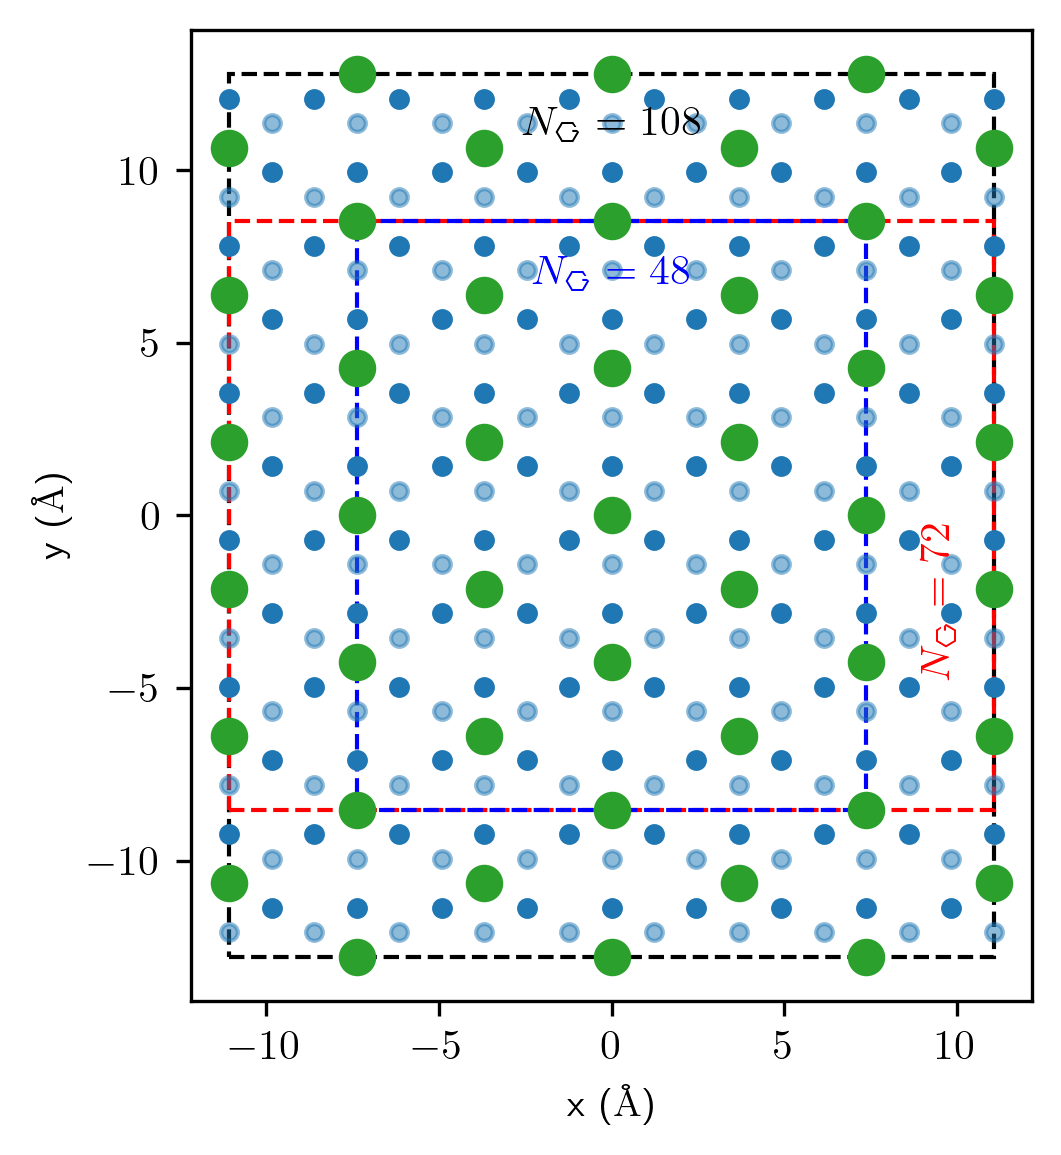

In [20]:
import matplotlib.patches as patches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['figure.figsize'] = (8.5*.8, 5.253*.8)

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{SVRsymbols}
"""
strain = 0.00
n=3 # `(2n)^2` C1/3 adsorption sites
fig, ax = gt.roughly_square_plot(n,strain)
width1 = 22.135609320730254
height1 = 17.04
rectangle1 = patches.Rectangle((-width1/2, -height1/2), width1, height1, edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rectangle1)
width2 = 14.757072880486835
height2 = 17.04
rectangle2 = patches.Rectangle((-width2/2, -height2/2), width2, height2, edgecolor='blue', facecolor='none', linestyle='--')
ax.add_patch(rectangle2)
ax.text(0, 11.3, r'$N_\graphene=108$', ha='center', va='center', color ='black',fontsize=10)
ax.text(9.5, -2.5, r'$N_\graphene=72$', ha='center', va='center', color ='red', fontsize=10,rotation=90)
ax.text(0, 7, r'$N_\graphene=48$', ha='center', va='center', color ='blue', fontsize=10)
gt.roughly_square(n,strain) #print out the relevant PIMC parameters
fig.set_dpi(300)
ax.set_ylabel(r"y ($\mathrm{\AA}$)")
ax.set_xlabel(r"x ($\mathrm{\AA}$)")
plt.savefig(r'../figures/Fig1.pdf', format='pdf')
plt.savefig(r'../figures/Fig1.svg', format='svg')
plt.show()
#overlay the system sizes and label them like sangwooks paper.
#48 - --Lx=14.757072880486835 --Ly=17.04
#72 - --Lx=22.135609320730254 --Ly=17.04

In [21]:
#Here I am finding the minimum E/N in the three system sizes and getting a error bound
Minimum = [np.nanmin(sorted_EN[r'$N_g = T1Mid$']),np.nanmin(sorted_EN[r'$N_g = T1Hi$']),np.nanmin(sorted_EN[r'$N_g = \infty$'])]
print('Average Minimum E/N:',np.mean(Minimum))
print('Standard Deviation:',np.std(Minimum))
      

Average Minimum E/N: -124.33643666666667
Standard Deviation: 0.0219237306030582
